# Wage And Gini Distribution across Danish Municipalities

Imports and set magics:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

# Read and clean data

## Wage

**Read the Wage data** in ``LIGELB1.xlsx`` and **clean it** removing and renaming columns:

In [3]:
# a. load data
wage = pd.read_excel('LIGELB1.xlsx', skiprows=2)

# b. dropping columns which aren't needed
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
wage.drop(drop_these, axis=1, inplace=True)

# c. rename columns
wage.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

The dataset for wages in the different municipalities now looks like this:

In [4]:
#We remove Christiansø using our function and display the data:
wage = dataproject.only_keep_municipalities_and_Hele_Landet(wage)
wage.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


**Convert the dataset to long format**:

In [5]:
# a. rename year columns
mydict = {str(i):f'wage{i}' for i in range(2009,2019)}
wage.rename(columns = mydict, inplace=True)

# b. convert to long
wage_long = pd.wide_to_long(wage, stubnames='wage', i='municipality', j='year').reset_index()

# c. showwing the five first rows
wage_long.head(5)

,municipality,year,wage
0,Hele landet,2009,35734
1,København,2009,36607
2,Frederiksberg,2009,41119
3,Dragør,2009,43215
4,Tårnby,2009,36147


## Gini

**Read the Wage data** in ``IFOR41.xlsx`` and **clean it** removing and renaming columns:

In [6]:
# a. load
gini = pd.read_excel('IFOR41.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0']
gini.drop(drop_these, axis=1, inplace=True)

# c. rename columns
gini.rename(columns = {'Unnamed: 1':'municipality'}, inplace=True)

In [7]:
#We remove Christiansø using our 'only_keep_municipalities_and_Hele_Landet' function and display the data:
gini = dataproject.only_keep_municipalities_and_Hele_Landet(gini)
gini.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


**Convert the dataset to long format**:

In [8]:
# a. rename year columns
mydict1 = {str(k):f'gini{k}' for k in range(2009,2020)}
gini.rename(columns = mydict1, inplace=True)

# b. convert to long
gini_long = pd.wide_to_long(gini, stubnames='gini', i='municipality', j='year').reset_index()

# c. show
gini_long.head()

,municipality,year,gini
0,Hele landet,2009,26.74
1,København,2009,29.38
2,Frederiksberg,2009,30.33
3,Dragør,2009,26.25
4,Tårnby,2009,21.40


## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the wage and gini coefficient  in each municipality

The **static plot** is:

In [9]:
def plot_wage_gini(wage,gini,dataset,municipality): 
    
    if dataset == 'wage':
        df = wage
        y = 'wage'
    else:
        df = gini
        y = 'gini'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plots** can be found below, where you are able to compare different municipalities against each other or the entire country, for both the wage level and the gini coefficient. 

In [10]:
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 

interactive(children=(Dropdown(description='Dataset', options=('wage', 'gini'), value='wage'), Dropdown(descri…

interactive(children=(Dropdown(description='Dataset', options=('wage', 'gini'), value='wage'), Dropdown(descri…

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. This means removing Christiansø from our datasets, so they represent the same municpalities and all of Denmark. Both our datasets contains the same years and municipalities after removing Christiansø.

In [11]:
# Checking which years and municipalities the two data sets contain 
print(f'Years in gini: {gini_long.year.unique()}')
print(f'Municipalities in gini_long = {len(gini_long.municipality.unique())}')
print(f'Years in wage: {wage_long.year.unique()}')
print(f'Municipalities in wage = {len(wage_long.municipality.unique())}')

merged = pd.merge(gini_long, wage_long ,how='inner',on=['municipality','year'])
print('Merged:')
print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

Years in gini: [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Municipalities in gini_long = 99
Years in wage: [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Municipalities in wage = 99
Merged:
Number of municipalities = 99
Number of years          = 10


In [12]:
# We Merge the two datasets using pd.merge enabling us to look a both wage level and gini coeffcient in the same table. 
joinboth = pd.merge(gini_long, wage_long,how='inner',on=['municipality','year'])
joinboth.head()

,municipality,year,gini,wage
0,Hele landet,2009,26.74,35734
1,København,2009,29.38,36607
2,Frederiksberg,2009,30.33,41119
3,Dragør,2009,26.25,43215
4,Tårnby,2009,21.40,36147


In [13]:
# Group data by municipality and year
joinboth2 = joinboth.groupby(['municipality','year','gini','wage']).sum().reset_index()
joinboth2.head()

,municipality,year,gini,wage
0,Aabenraa,2009,25.57,33192
1,Aabenraa,2010,25.09,34119
2,Aabenraa,2011,25.01,34825
3,Aabenraa,2012,24.83,35338
4,Aabenraa,2013,25.36,35615


In [14]:
# We construct a table for mean, min & max for each year. 
# We observe that both the mean, min and max has increased for both wage and gini during this period for the entire country. 
joinboth2.groupby(['year']).agg(['mean','max','min']).round(2)

gini                    wage              
       mean    max    min      mean    max    min
year                                             
2009  25.28  42.42  20.40  35588.95  50949  31438
2010  25.50  43.42  21.65  36769.74  54630  31948
2011  25.48  42.83  20.94  37238.27  54940  32292
2012  25.11  42.13  20.71  37945.55  55481  32716
2013  25.50  43.39  21.51  38302.07  56118  32864
2014  25.73  43.98  21.44  38685.46  56279  33198
2015  26.04  47.77  22.03  39309.05  57422  33836
2016  26.38  45.02  22.50  39824.34  58411  34174
2017  26.58  45.44  21.63  40647.82  59791  34563
2018  26.40  44.50  22.88  41407.98  60720  35101

In [15]:
#In this table we look at mean, min and max for each municipality. 
joinboth3 = joinboth.groupby(['municipality','gini','wage']).sum().reset_index()
joinboth3.groupby(['municipality']).agg(['mean','max','min']).round(2)

gini                   wage                  year        \
                  mean    max    min     mean    max    min    mean   max   
municipality                                                                
Aabenraa         25.60  27.42  24.83  35671.2  37806  33192  2013.5  2018   
Aalborg          27.31  28.70  25.72  37396.4  40309  34294  2013.5  2018   
Aarhus           31.48  33.29  28.64  39497.7  42623  35921  2013.5  2018   
Albertslund      25.14  25.68  23.99  37644.1  39882  34895  2013.5  2018   
Allerød          25.24  26.34  24.23  49270.7  52694  45247  2013.5  2018   
...                ...    ...    ...      ...    ...    ...     ...   ...   
Vejle            26.21  27.02  25.19  38435.7  41575  35036  2013.5  2018   
Vesthimmerlands  24.79  28.33  23.94  33787.4  36487  31575  2013.5  2018   
Viborg           24.74  25.84  23.81  36559.1  39431  33661  2013.5  2018   
Vordingborg      24.87  25.82  23.81  36342.1  38744  33777  2013.5  2018   
Ærø              25.61  27.17  24.44  34300.9  36566  31866  2013.5  2018   

                       
                  min  
municipality           
Aabenraa         2009  
Aalborg          2009  
Aarhus           2009  
Albertslund      2009  
Allerød          2009  
...               ...  
Vejle            2009  
Vesthimmerlands  2009  
Viborg           2009  
Vordingborg      2009  
Ærø              2009  

[99 rows x 9 columns]

## Wage plots

We change the type to an integer and group by municipality in order to make a graph which has the wage level in selected municipalities. The following municipalities we have chosen are just some random municipalities where we believed there would be a significant diffference. 

In [16]:
wage_long['wage'] = wage_long['wage'].astype(int)
wage_grouped = wage_long.groupby('municipality')['wage']
print(wage_grouped.head(5))

0      35734
1      36607
2      41119
3      43215
4      36147
       ...  
490    33114
491    36916
492    33990
493    33057
494    36912
Name: wage, Length: 495, dtype: int32


In [17]:
wage_mean = wage_grouped.mean() # mean wage
wage_mean.name = 'wage_mean' 
wage_graph = wage_long.set_index('municipality').join(wage_mean, how='left')
wage_graph.xs('Gentofte')
municipalities2 = ['København','Roskilde','Ishøj','Gentofte','Hele landet']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for m in municipalities2:
    wage_test.xs(m).plot(x='year',y='wage',ax=ax,label=m)


ax.legend(frameon=True)
ax.set_ylabel('wage')
ax.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

NameError: name 'wage_test' is not defined

The graph contains **Hele Landet**, **Ishøj**, **Gentofte**, **Roskilde**, and **København**
Which we have made seperat tables for below.

In [18]:
wage_hele_landet = wage_long.loc[wage_long['municipality'] == 'Hele landet', :]
wage_Ishøj = wage_long.loc[wage_long['municipality'] == 'Ishøj', :]
wage_Gentofte = wage_long.loc[wage_long['municipality'] == 'Gentofte', :]
wage_Roskilde = wage_long.loc[wage_long['municipality'] == 'Roskilde', :]
wage_København = wage_long.loc[wage_long['municipality'] == 'København', :]

We construct a table for the municipalities with the highest wage level by only looking at municipalities with a mean wage above 50.000 DKK.

In [19]:
wage_rich = wage_graph.loc[(wage_graph['wage_mean'] > 50000), :] # We choose the municipalities with a mean wage above 50.000 DKK
wage_rich2018 = wage_rich.loc[(wage_rich['year'] == 2018), :] # We construct a table where only the wage from 2018 is included for the richest municipalities 
print('The five municipalities with the highest wage level is; Furesø, Gentofte, Hørsholm, Lyngby-Taarbæk and Rudersdal')
wage_rich2018.head(5)

The five municipalities with the highest wage level is; Furesø, Gentofte, Hørsholm, Lyngby-Taarbæk and Rudersdal


,year,wage,wage_mean
municipality,,,
Furesø,2018,53424,50131.5
Gentofte,2018,60720,56095.5
Hørsholm,2018,59484,56092.5
Lyngby-Taarbæk,2018,54920,50716.1
Rudersdal,2018,60019,55806.4


## Gini Graph

Now we look at the gini coefficient which we plot in a graph in order to get a visualization of the increasing trend for several municipalities.

In [20]:
gini_grouped = gini_long.groupby('municipality')['gini']
print(gini_grouped.head(10))

0      26.74
1      29.38
2      30.33
3      26.25
4      21.40
       ...  
985    24.96
986    24.58
987    24.78
988    24.84
989    28.70
Name: gini, Length: 990, dtype: float64


In [21]:
gini_mean = gini_grouped.mean() # mean gini
gini_mean.head(10)

municipality
Aabenraa       25.601
Aalborg        27.314
Aarhus         31.482
Albertslund    25.139
Allerød        25.245
Assens         23.237
Ballerup       25.141
Billund        25.153
Bornholm       22.928
Brøndby        24.781
Name: gini, dtype: float64

In [22]:
gini_mean.name = 'gini_mean'
gini_graph = gini_long.set_index('municipality').join(gini_mean, how='left')
gini_graph.xs('Gentofte')

,year,gini,gini_mean
municipality,,,
Gentofte,2009,42.42,44.09
Gentofte,2010,43.42,44.09
Gentofte,2011,42.83,44.09
Gentofte,2012,42.13,44.09
Gentofte,2013,43.39,44.09
Gentofte,2014,43.98,44.09
Gentofte,2015,47.77,44.09
Gentofte,2016,45.02,44.09
Gentofte,2017,45.44,44.09


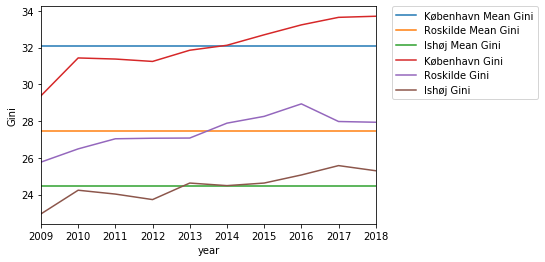

In [23]:
municipalities2 = ['København','Roskilde','Ishøj']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for m in municipalities2:
    gini_graph.xs(m).plot(x='year',y='gini_mean',ax=ax,label=m + ' Mean Gini')

for m in municipalities2:
    gini_graph.xs(m).plot(x='year',y='gini',ax=ax,label=m + ' Gini')

ax.legend(frameon=True)
ax.set_ylabel('Gini')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [24]:
#Here we look at the 5 municipalities with the highest gini coeffcient
gini_2018 = gini_graph.loc[(gini_graph['year'] == 2018), :] # Here we select the yer 2018
gini_large = gini_2018.loc[(gini_2018['gini_mean'] > 33), :] # Here we choose the municipalities with the highest mean gini by demanding that it is above 33
gini_large.head(8)

,year,gini,gini_mean
municipality,,,
Frederiksberg,2018,35.42,33.926
Gentofte,2018,44.50,44.090
Hørsholm,2018,38.48,37.928
Lyngby-Taarbæk,2018,36.61,34.655
Rudersdal,2018,41.51,39.863


# Analysis

To get an overview of the wage increase in different municipalities we look at the increase since the minimum wage level, which is at the start of the period in 2009. Then we find the municipalities with the largest and smallets level change and put them in a graph and a table. 

In [25]:
wage_min = wage_grouped.min()
wage_min.name = 'wage_min'
wage_test2 = wage_long.set_index('municipality').join(wage_min, how='left')
wage_test2['change'] = wage_test2.wage - wage_test2.wage_min
wage_change = wage_test2.loc[(wage_test2['year'] == 2018), :]
wage_change.head(10)

,year,wage,wage_min,change
municipality,,,,
Aabenraa,2018,37806,33192,4614
Aalborg,2018,40309,34294,6015
Aarhus,2018,42623,35921,6702
Albertslund,2018,39882,34895,4987
Allerød,2018,52694,45247,7447
Assens,2018,38415,33073,5342
Ballerup,2018,44641,38193,6448
Billund,2018,39139,32860,6279
Bornholm,2018,35733,31468,4265


In [26]:
wage_change_large = wage_change.loc[(wage_change['change'] > 8500), :]
wage_change_large.head(20)

,year,wage,wage_min,change
municipality,,,,
Dragør,2018,52807,43215,9592
Gentofte,2018,60720,50186,10534
Hørsholm,2018,59484,50949,8535
Lyngby-Taarbæk,2018,54920,45477,9443
Rudersdal,2018,60019,50057,9962


In [27]:
wage_change_low = wage_change.loc[(wage_change['change'] < 4400), :]
wage_change_low.head(10)

,year,wage,wage_min,change
municipality,,,,
Bornholm,2018,35733,31468,4265
Hjørring,2018,37209,32953,4256
Ishøj,2018,37748,33619,4129
Langeland,2018,35101,31500,3601
Lolland,2018,35732,31450,4282


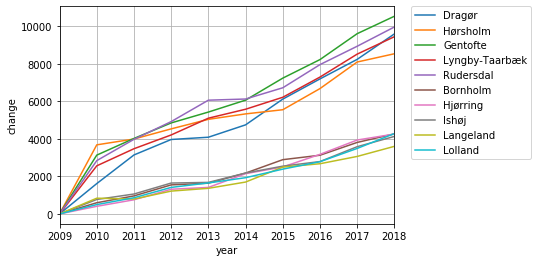

In [28]:
municipalities_2 = ['Dragør','Hørsholm','Gentofte','Lyngby-Taarbæk','Rudersdal', 'Bornholm', 'Hjørring', 'Ishøj', 'Langeland', 'Lolland']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for m in municipalities_2:
    wage_test2.xs(m).plot(x='year',y='change',ax=ax,label=m)


ax.legend(frameon=True)
ax.set_ylabel('change')
ax.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Conclusion

After analyzing our data we can conclude that the municipalities with the highest wages (Table1) also has the largest level increase in wages during the period (Table2), and the largest gini (Table3). Both **Gentofte**, **Hørsholm**, **Lyngby-Taarbæk**, and **Rudersdal** is included in all three catagories. Suggesting that higher wages, high inequality and large increases in the wage level in correlated for danish municipalities. 

In [29]:
print('Table1')
wage_rich2018.head()

Table1


,year,wage,wage_mean
municipality,,,
Furesø,2018,53424,50131.5
Gentofte,2018,60720,56095.5
Hørsholm,2018,59484,56092.5
Lyngby-Taarbæk,2018,54920,50716.1
Rudersdal,2018,60019,55806.4


In [458]:
print('Table2')
wage_change_large.head()

Table2


,year,wage,wage_min,change
municipality,,,,
Dragør,2018,52807,43215,9592
Gentofte,2018,60720,50186,10534
Hørsholm,2018,59484,50949,8535
Lyngby-Taarbæk,2018,54920,45477,9443
Rudersdal,2018,60019,50057,9962


In [51]:
print('Table3')
gini_large.head()

Table3


,year,gini,gini_mean
municipality,,,
Frederiksberg,2018,35.42,33.926
Gentofte,2018,44.50,44.090
Hørsholm,2018,38.48,37.928
Lyngby-Taarbæk,2018,36.61,34.655
Rudersdal,2018,41.51,39.863


In [73]:
#COMBINING
Conclusion_table_1 = pd.merge(wage_change, gini_2018, how='inner',on=['municipality'])
wage_2018 = wage_graph.loc[(wage_graph['year'] == 2018), :]
Conclusion_table_2 = pd.merge(Conclusion_table_1, wage_2018, how='inner',on=['municipality'])
#Conclusion_table_3 = Conclusion_table_2.loc[wage_long['municipality'] == 'Hele landet', :]
drop_these1 = ['year_x']
Conclusion_table_2.drop(drop_these1, axis=1, inplace=True)
Conclusion_table_2.head()

,wage_x,wage_min,change,year_y,gini,gini_mean,year,wage_y,wage_mean
municipality,,,,,,,,,
Aabenraa,37806,33192,4614,2018,25.91,25.601,2018,37806,35671.2
Aalborg,40309,34294,6015,2018,28.70,27.314,2018,40309,37396.4
Aarhus,42623,35921,6702,2018,32.92,31.482,2018,42623,39497.7
Albertslund,39882,34895,4987,2018,25.11,25.139,2018,39882,37644.1
Allerød,52694,45247,7447,2018,25.50,25.245,2018,52694,49270.7
